In [46]:
import numpy as np
import random

In [55]:
class KMeans:
    def __init__(self, n_clusters = 3, n_iters = 200):
        self.n_clusters = n_clusters
        self.n_iters = n_iters
        self.centroids = None

    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for _ in range(self.n_iters):
            cluster_groups = self.assign_clusters(X)
            old_centroids = self.centroids

            self.centroids = self.move_centroids(X, cluster_groups)
            if(self.centroids == old_centroids).all():
                break

        return cluster_groups

    def assign_clusters(self, X):
        distances = []
        cluster_group = []
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))   # Euclidean distance
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)


    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)  #[0,1]

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis = 0))

        return np.array(new_centroids)

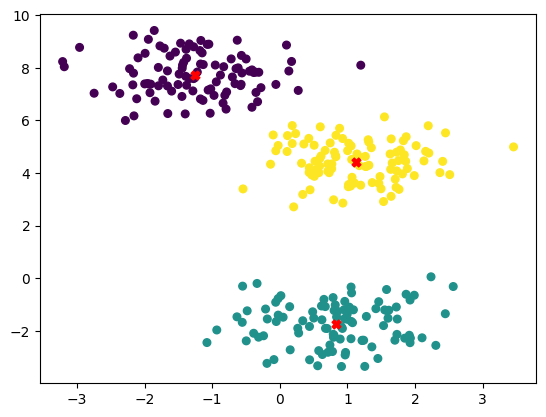

In [56]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X,_ = make_blobs(n_samples=300, n_features=3, cluster_std=0.8, random_state=0)

model = KMeans(n_clusters=3)
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:,1], s=30, cmap='viridis', c = labels)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], marker='X', c='red', s = 40)
# plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)


In [49]:
[1,2] -> 0
[1,2] -> 1
[1,2] -> 0
[1,2] -> 0
[1,2] -> 0
[1,2] -> 1

cluster_groups = [0,1,0,0,0,1]


[1,2] 
centroids =  [(2,4), (3,4)]
                0      1

distances [1, 2]
X[(1,2)] = 0


Cluster (0) 
    [(1,2), (2,3)]
    centroid(Mean) = (1.5,2.5)


Cluster(1)
    [(4,5), (5,6)]
    centroid(Mean) = (4.5, 5.5)

def cluster(self):  
    make_blobs(X[:, 0], X[:, 1])

SyntaxError: invalid syntax (1155378975.py, line 1)